## Problem Statement

**To predict the price of used car given the data collected from various sources.
To build a model that can assign a price for a vehicle by evaluating car features and other variables which will affect the price of the used car.**

**Independent Variable:**
* Transmission
* Owner Type
* Mileage
* Engine
* Years
* Kilometers Driven
* Fuel Type
* New Price
* Seats
* Location 
<br>

**Dependent Variable:**
* Price

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***

### Import data
- A training set which we will split further to train and validation set to train and test the model.

In [2]:
usedcars = pd.read_csv("train-data.csv")

In [3]:
usedcars.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


***

### About Data

<font size="10" face="Calibri">
<table style="width:80%">
<tr>
    <th width="7%">S.N</th>
    <th width="15%">Feature</th>
    <th width="20%" style="text-align:center">Type of Data</th>
    <th width="40%" style="text-align:left">Description</th>
    </tr>
    <tr>
        <th>1</th>
        <td>Name</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The brand and model of the car</td>
        </tr>
    <tr>
        <th>2</th>
        <td>Location</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The location in which the car is being sold or is available for purchase</td>
        </tr>
    <tr>
        <th>3</th>
        <td>Year</td>
        <td style="text-align:center">Numerical -Interval</td>
        <td style="text-align:left">The year or edition of the model</td>
        </tr>
    <tr>
        <th>4</th>
        <td>Kilometers_Driven</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The total kilometres driven in the car by the previous owner(s) in KM</td>
        </tr>
    <tr>
        <th>5</th>
        <td>Fuel_Type</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The type of fuel used by the car</td>
        </tr>
    <tr>
        <th>6</th>
        <td>Transmission</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The type of transmission used by the car</td>
        </tr>
    <tr>
        <th>7</th>
        <td>Owner_Type</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">Whether the ownership is Firsthand, Second hand or other</td>
        </tr>
    <tr>
        <th>8</th>
        <td>Mileage</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The standard mileage offered by the car company in kmpl or km/kg</td>
        </tr>
    <tr>
        <th>9</th>
        <td>Engine</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The displacement volume of the engine in CC</td>
        </tr>
    <tr>
        <th>10</th>
        <td>Power</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The maximum power of the engine in bhp</td>
        </tr>
    <tr>
        <th>11</th>
        <td>Seats</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The number of seats in the car</td>
        </tr>
    <tr>
        <th>12</th>
        <td>New_Price</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The price of a new car of the same model</td>
        </tr>
    <tr>
        <th>13</th>
        <td>Price</td>
        <td style="text-align:center">Numeriical -Ratio</td>
        <td style="text-align:left">The price of the used car in INR Lakhs</td>
    </tr>
</table>

In [4]:
usedcars.shape

(6019, 14)

In [5]:
print("Used Cars Dataset: ")
print("Number of Rows: ", usedcars.shape[0])
print("Number of columns: ", usedcars.shape[1])

Used Cars Dataset: 
Number of Rows:  6019
Number of columns:  14


In [6]:
usedcars.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [8]:
#Checking for Null values
usedcars.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
#Number of unique values for each variable
usedcars.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [ ]:
#list(usedcars["Name"].unique())

**The variable name contains company name followed by model name. Because of this the number of unique values in this categorical variable is too large. To use this variable we can split the name into two different variables namely Company_name and Model_name**

In [10]:
np.array(usedcars["Location"].unique())

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [11]:
np.array(usedcars["Year"].unique())

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [12]:
np.array(usedcars["Fuel_Type"].unique())

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [13]:
np.array(usedcars["Transmission"].unique())

array(['Manual', 'Automatic'], dtype=object)

In [14]:
np.array(usedcars["Owner_Type"].unique())

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [16]:
#np.array(usedcars["Mileage"].unique())

**The datatype of the variable "Mileage" is object type, it should be converted into float**
<br>
**The variable "Mileage" has two units we have to convert the data such that this variable will have single unit. And the unit is  given after each value, it should be removed.**

In [17]:
kmkg = 0
kmpl = 0
for i in usedcars.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print("The number of rows with unit km/kg : ", kmkg)
print("The number of rows with unit kmpl : ", kmpl)

The number of rows with unit km/kg :  66
The number of rows with unit kmpl :  5951


In [18]:
usedcars[usedcars["Fuel_Type"].isin(["CNG","LPG"])]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,17.5 km/kg,1373 CC,80.46 bhp,7.0,NaN,8.25
5881,5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.70
5902,5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.25
5935,5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,3.10


**Here, we can see that the unit for mileage is km/kg is for the Fuel_Type LPG and CNG.
So, we will be converting the values with unit km/kg to kmpl by following conversion factors.**

1 litre of CNG ~ 0.18 kg
<br>

1 litre of LPG ~ 0.55 kg

In [ ]:
#np.array(usedcars["Engine"].unique())

**The datatype of the variable "Engine" is object type, it should be converted into float**
**The unit is given in after each value, it should be removed.**

In [ ]:
#np.array(usedcars["Power"].unique())

**The datatype of the variable "Power" is object type, it should be converted into float**
<br>
**The unit given after ecah value should be removed**
<br>
**The unique values also contain a value "null bhp", this can be replaced with Nan value**

In [19]:
usedcars[usedcars["Power"] == "null bhp"]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,NaN,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.20
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,1.75
5925,5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,NaN,2.85
5943,5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,NaN,1.70


In [20]:
np.array(usedcars["Seats"].unique())

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

<hr>

**The variable "Unnamed: 0" will be removed as it is giving the index of the each row and not adding any useful information.**
<br>

**The variable New_Price has around 5195 null values that is 86.31% of the data is missing and that's why we will be removing this variable as well.**

<hr>

### Data Cleaning

In [21]:
#Checking for duplicate values
usedcars.duplicated().sum()

0

In [22]:
#Dropping the variables "Unnamed: 0", "New_Price"
usedcars = usedcars.drop(columns = ["Unnamed: 0", "New_Price"])

In [23]:
usedcars["Company_Name"] = usedcars["Name"].str.split(" ", n = 1, expand = True)[0]
usedcars["Model_Name"] = usedcars["Name"].str.split(" ", n = 2, expand = True)[1]

usedcars["Mileage"] = usedcars["Mileage"].str.split(" ", n = 1, expand = True)[0]

usedcars["Engine"] = usedcars["Engine"].str.split(" ", n = 1, expand = True)[0]

usedcars["Power"] = usedcars["Power"].str.split(" ", n = 1, expand = True)[0]

In [24]:
usedcars.Company_Name.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

**The Company_Name ISUZU is repeated in unique values because of the different cases used, it should be removed.**

In [25]:
usedcars.loc[usedcars.Company_Name == "Isuzu", "Company_Name"] = "ISUZU"

In [26]:
usedcars["Power"].replace(to_replace = "null", value = np.nan, inplace = True)

In [27]:
usedcars["Mileage"] = pd.to_numeric(usedcars["Mileage"], errors = "coerce")
usedcars["Engine"] = pd.to_numeric(usedcars["Engine"], errors = "coerce")
usedcars["Power"] = pd.to_numeric(usedcars["Power"], errors = "coerce")

In [29]:
n=0
for i in usedcars['Fuel_Type']:
    if i == 'CNG':
        usedcars['Mileage'][n] = usedcars['Mileage'][n]*5.55
    elif i == 'LPG':
        usedcars['Mileage'][n] = usedcars['Mileage'][n]*1.81
    n = n+1

<ipython-input-29-bdc1c82524ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars['Mileage'][n] = usedcars['Mileage'][n]*5.55
<ipython-input-29-bdc1c82524ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars['Mileage'][n] = usedcars['Mileage'][n]*1.81


In [149]:
usedcars["Model_Age"] = usedcars["Year"].apply(lambda x : 2020 - x)

<hr>

## Outlier 

In [31]:
usedcars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,19.237426,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,13.045966,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.260000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.190000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,186.147000,5998.000000,560.000000,10.000000,160.000000


**The variables "Mileage" and "Seats" have minimum values 0.These 0 values can be replaced with Nan values and can be treated as null values**
<br>
**The minimum value in "Engine" is too small.**
<br>
**Have to check if varibles "Kilometers_Driven" and "Mileage"

In [47]:
usedcars["Mileage"].replace(to_replace = 0.0, value = np.nan, inplace = True)
usedcars["Seats"].replace(to_replace = 0.0, value = np.nan, inplace = True)

In [52]:
usedcars[usedcars.Engine < 600]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.0,Mahindra,E


In [53]:
usedcars["Engine"].replace(to_replace = 72.0, value = np.nan, inplace = True)

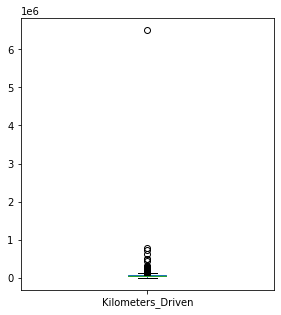

In [43]:
plt.subplot(122)
usedcars["Kilometers_Driven"].plot.box(figsize=(10,5))
plt.show()

In [46]:
usedcars[usedcars.Kilometers_Driven > 1000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0,BMW,X5


In [60]:
usedcars.drop(usedcars[usedcars.Kilometers_Driven > 1000000].index, inplace = True )

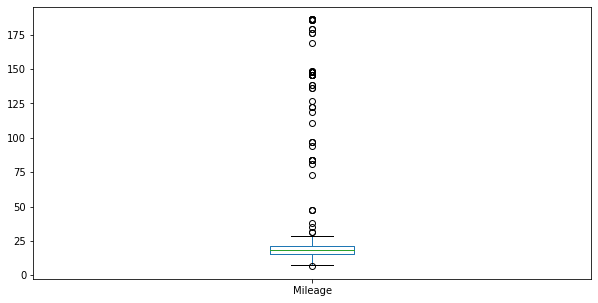

In [63]:
usedcars["Mileage"].plot.box(figsize=(10,5))
plt.show()

In [67]:
usedcars[usedcars.Mileage > 30]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,147.630,998.0,58.16,5.0,1.75,Maruti,Wagon
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,38.191,814.0,55.20,5.0,2.35,Hyundai,EON
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,147.630,998.0,58.16,5.0,3.25,Maruti,Wagon
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,145.965,998.0,67.10,5.0,1.40,Maruti,Zen
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,83.805,1196.0,73.00,5.0,4.70,Maruti,Eeco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,97.125,1373.0,80.46,7.0,8.25,Maruti,Ertiga
5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,147.630,998.0,58.16,5.0,3.70,Maruti,Wagon
5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,145.410,998.0,58.20,5.0,2.25,Maruti,Wagon
5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,179.043,998.0,58.20,4.0,3.10,Maruti,Alto


**The extreme values in "Mileage" can be contributed to the Fuel_Type of that particular type. We will not be removing these extreme values**

### Missing value Imputation

In [68]:
usedcars.describe(include = "all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
count,6018,6018,6018.000000,6018.000000,6018,6018,6018,5948.000000,5981.000000,5875.000000,5975.000000,6018.000000,6018,6018
unique,1876,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,30,212
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,Maruti,Swift
freq,49,790,NaN,NaN,3204,4299,4928,NaN,NaN,NaN,NaN,NaN,1211,353
mean,NaN,NaN,2013.357594,57668.047690,NaN,NaN,NaN,19.457906,1621.306136,113.228412,5.279665,9.470243,NaN,NaN
std,NaN,NaN,3.269677,37878.783175,NaN,NaN,NaN,12.957234,600.860239,53.846427,0.806078,11.165926,NaN,NaN
min,NaN,NaN,1998.000000,171.000000,NaN,NaN,NaN,6.400000,624.000000,34.200000,2.000000,0.440000,NaN,NaN
25%,NaN,NaN,2011.000000,34000.000000,NaN,NaN,NaN,15.300000,1198.000000,75.000000,5.000000,3.500000,NaN,NaN
50%,NaN,NaN,2014.000000,53000.000000,NaN,NaN,NaN,18.240000,1493.000000,97.700000,5.000000,5.640000,NaN,NaN
75%,NaN,NaN,2016.000000,73000.000000,NaN,NaN,NaN,21.100000,1984.000000,138.100000,5.000000,9.950000,NaN,NaN


In [69]:
usedcars.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                37
Power                143
Seats                 43
Price                  0
Company_Name           0
Model_Name             0
dtype: int64

In [70]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Name"])["Engine"].transform("median"))
usedcars.Engine.isnull().sum()

32

In [72]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Company_Name","Model_Name","Fuel_Type","Transmission"])["Engine"].transform("median"))
usedcars.Engine.isnull().sum()

3

In [86]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Company_Name","Model_Name","Transmission"])["Engine"].transform("median"))
usedcars.Engine.isnull().sum()

2

In [87]:
usedcars[usedcars.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,40.88,Land,Rover
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,NaN,41.0,5.0,13.00,Mahindra,E


In [93]:
usedcars.at[1460,"Engine"] = 2993

In [94]:
usedcars.at[4446,"Engine"] = 1461

In [96]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Name"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

67

In [97]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Model_Name","Fuel_Type","Transmission","Engine"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

20

In [102]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Engine","Fuel_Type","Transmission"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

13

In [104]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Fuel_Type","Transmission"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

2

In [106]:
usedcars[usedcars.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.0,Smart,Fortwo
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,1461.0,41.0,5.0,13.0,Mahindra,E


In [136]:
usedcars = usedcars.dropna(subset = ["Mileage"])

3.

In [ ]:
usedcars[usedcars.Power.isnull()]

In [115]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Name"])["Power"].transform("median"))
usedcars.Power.isnull().sum()

In [117]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Transmission","Fuel_Type","Engine"])["Power"].transform("median"))
usedcars.Power.isnull().sum()

27

In [118]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine","Transmission"])["Power"].transform("median"))
usedcars.Power.isnull().sum()

25

In [120]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine"])["Power"].transform("median"))
usedcars["Power"].isnull().sum()

In [123]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Engine","Fuel_Type","Transmission"])["Power"].transform("median"))
usedcars["Power"].isnull().sum()

16

In [125]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Engine"])["Power"].transform("median"))
usedcars["Power"].isnull().sum()

16

In [127]:
usedcars = usedcars.dropna(subset = ["Power"])

4. Seats


In [130]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Name"])["Seats"].transform("median"))
usedcars.Seats.isnull().sum()

<ipython-input-130-427925b2c9dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Name"])["Seats"].transform("median"))


36

In [131]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Company_Name","Model_Name"])["Seats"].transform("median"))
usedcars.Seats.isnull().sum()

<ipython-input-131-3475af16be59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Company_Name","Model_Name"])["Seats"].transform("median"))


3

In [132]:
usedcars[usedcars.Seats.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,1.50,Maruti,Estilo
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,2.50,Maruti,Estilo
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,1.75,Maruti,Estilo


In [133]:
usedcars.at[2369,"Seats"] = 5
usedcars.at[3882,"Seats"] = 5
usedcars.at[5893,"Seats"] = 5

In [137]:
usedcars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Company_Name         0
Model_Name           0
dtype: int64

### Data Visualization

In [185]:
usedcars.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Company_Name', 'Model_Name', 'Model_Age'],
      dtype='object')

In [151]:
quant = [i for i in usedcars.columns if usedcars.dtypes[i] != 'object']

qual = [i for i in usedcars.columns if usedcars.dtypes[i] == 'object']

In [152]:
quant

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Model_Age']

In [153]:
qual

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Company_Name',
 'Model_Name']

#### Univariate Analysis

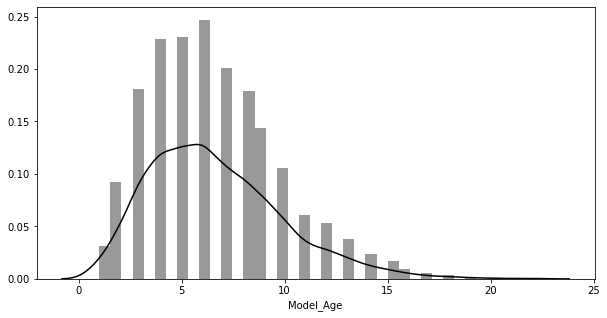

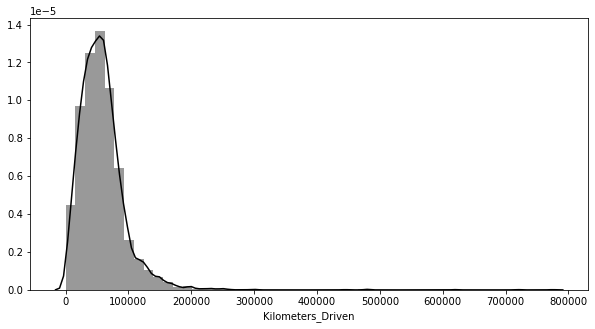

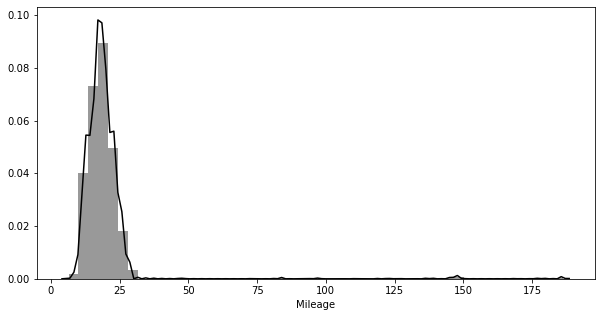

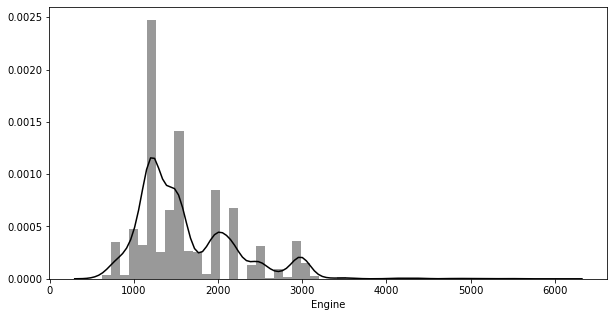

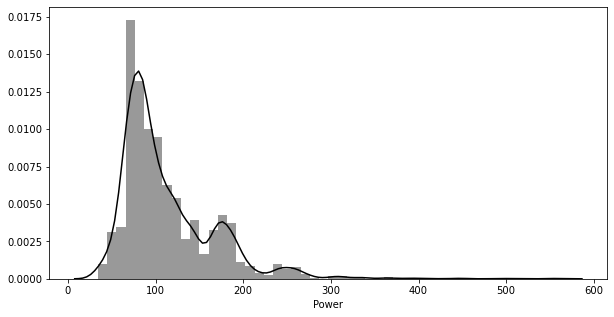

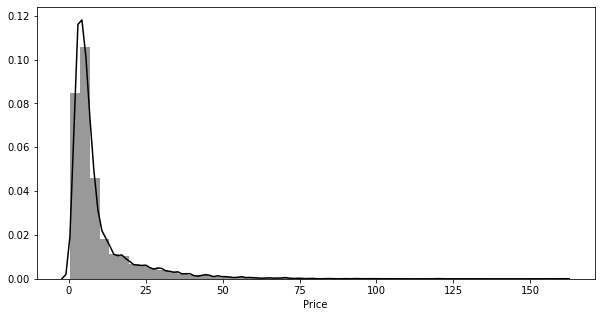

In [154]:
for i in ['Model_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']:
    plt.figure(figsize=(10, 5))
    sns.distplot(usedcars[i],color="black");
    plt.show()

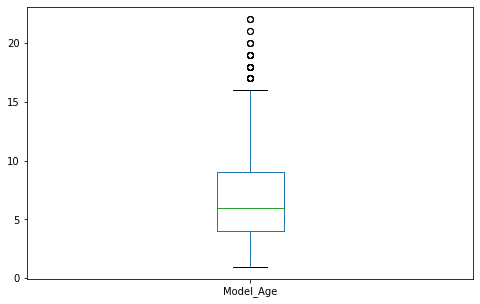

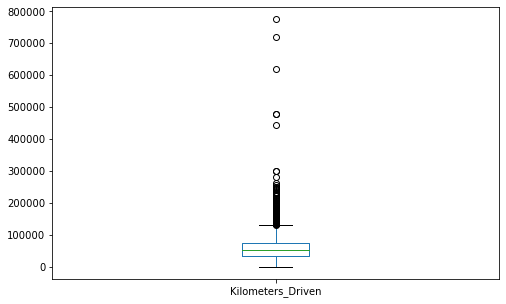

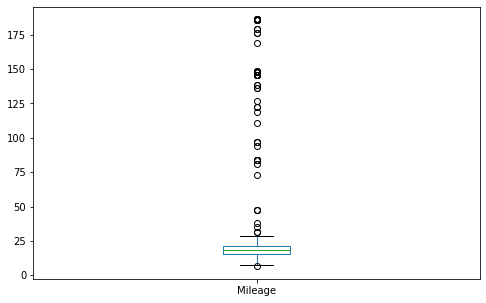

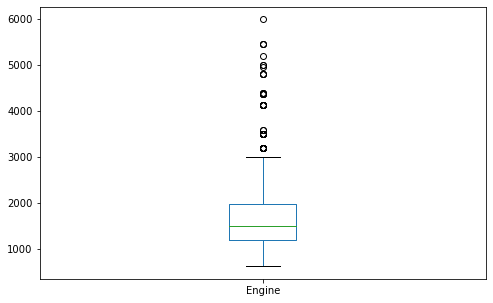

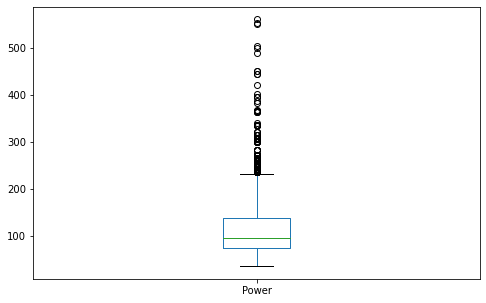

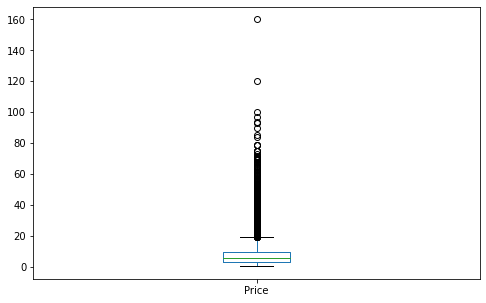

In [172]:
for i in ["Model_Age", 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']:
    usedcars[i].plot.box(figsize=(8,5))
    plt.show()

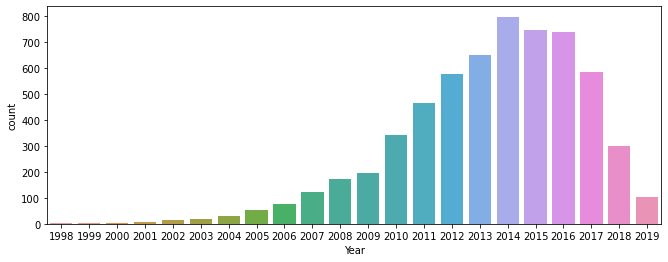

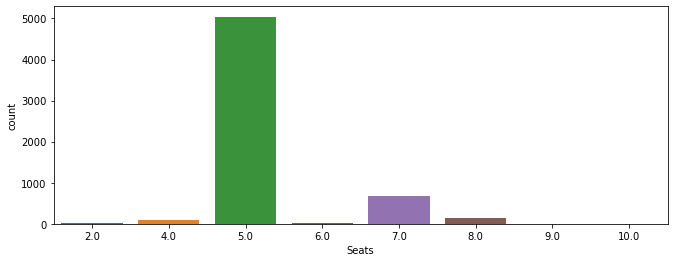

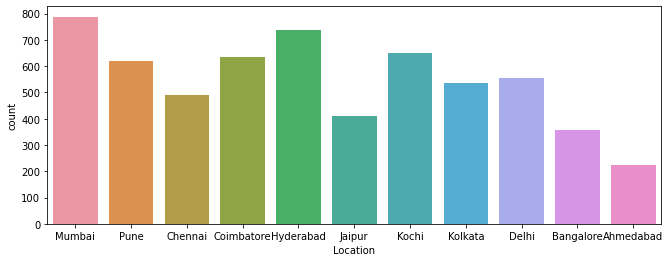

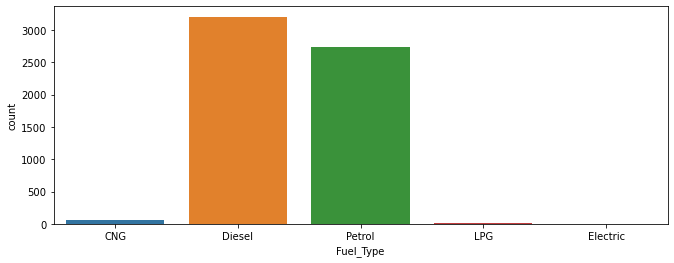

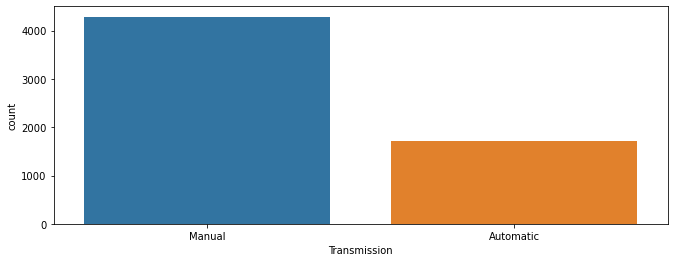

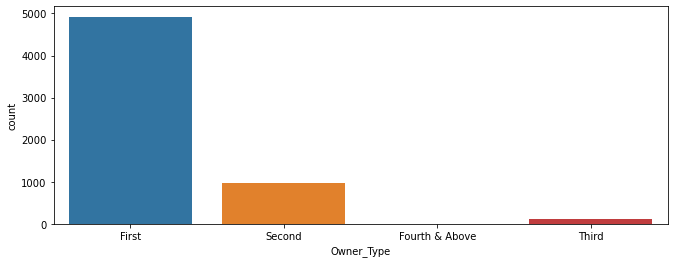

In [167]:
for i in ["Year","Seats",'Location','Fuel_Type','Transmission','Owner_Type']:
    plt.figure(figsize=(11, 4))
    sns.countplot(x = i , data = usedcars)
    plt.show()

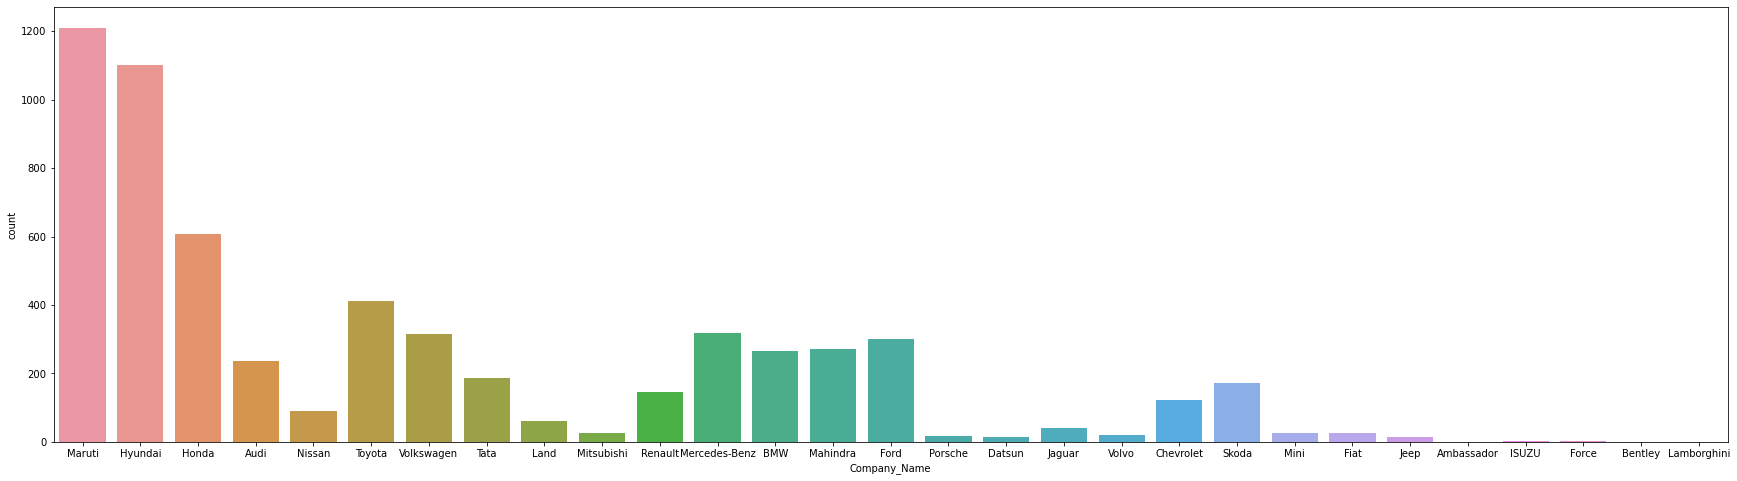

In [170]:
for i in ['Company_Name']:
    plt.figure(figsize=(30, 8))
    sns.countplot(x = i , data = usedcars)
    plt.show()

#### Bivariate

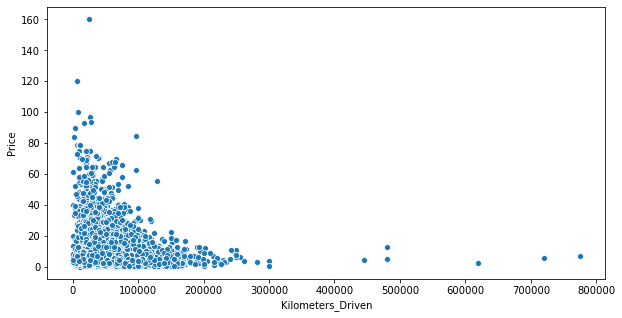

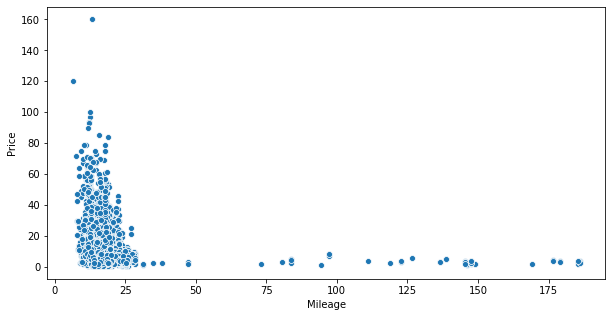

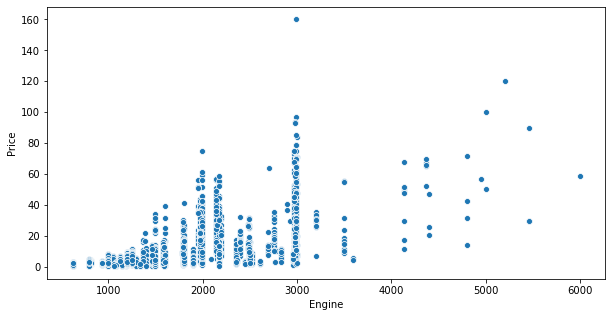

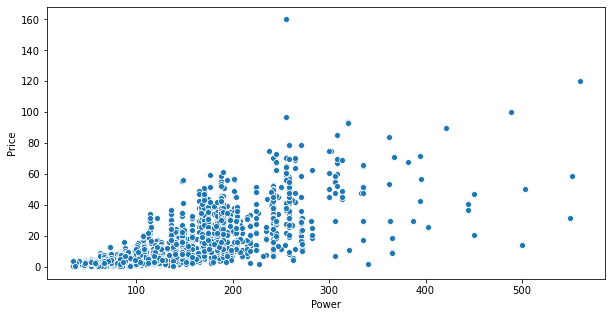

In [175]:
for i in ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']:
    plt.figure(figsize = (10,5))
    sns.scatterplot(x = usedcars[i], y = usedcars["Price"])

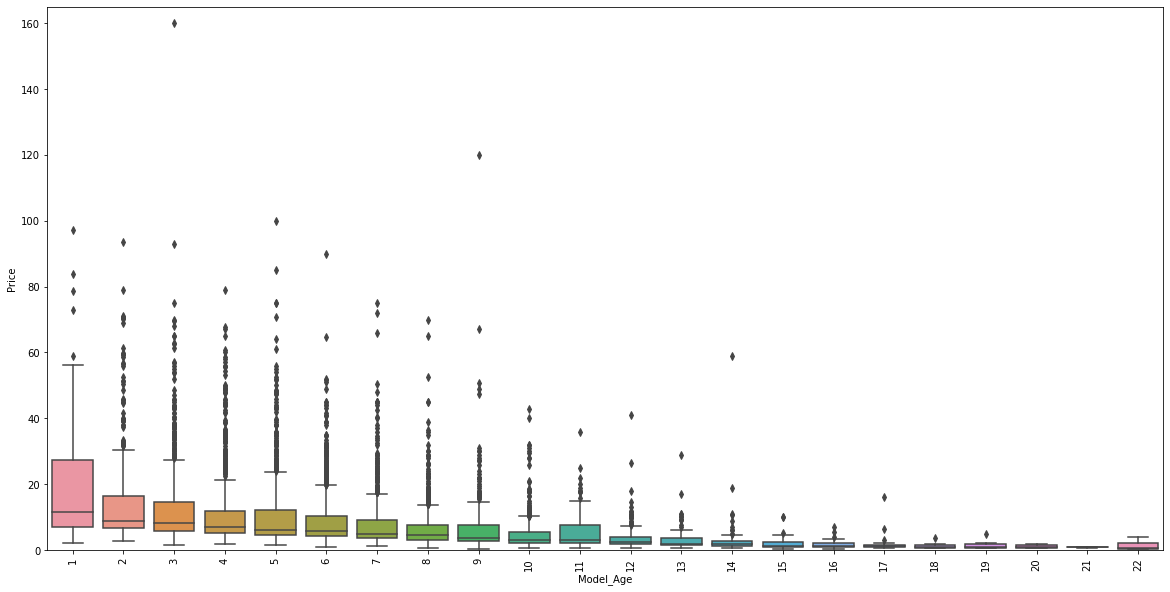

In [176]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x = "Model_Age", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

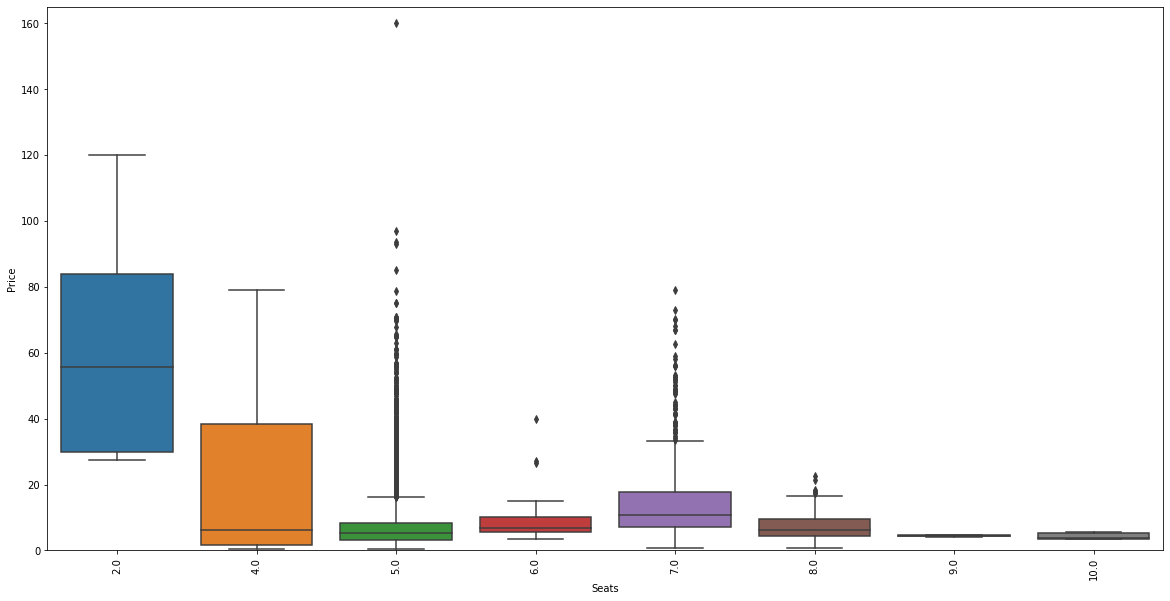

In [177]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x = "Seats", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

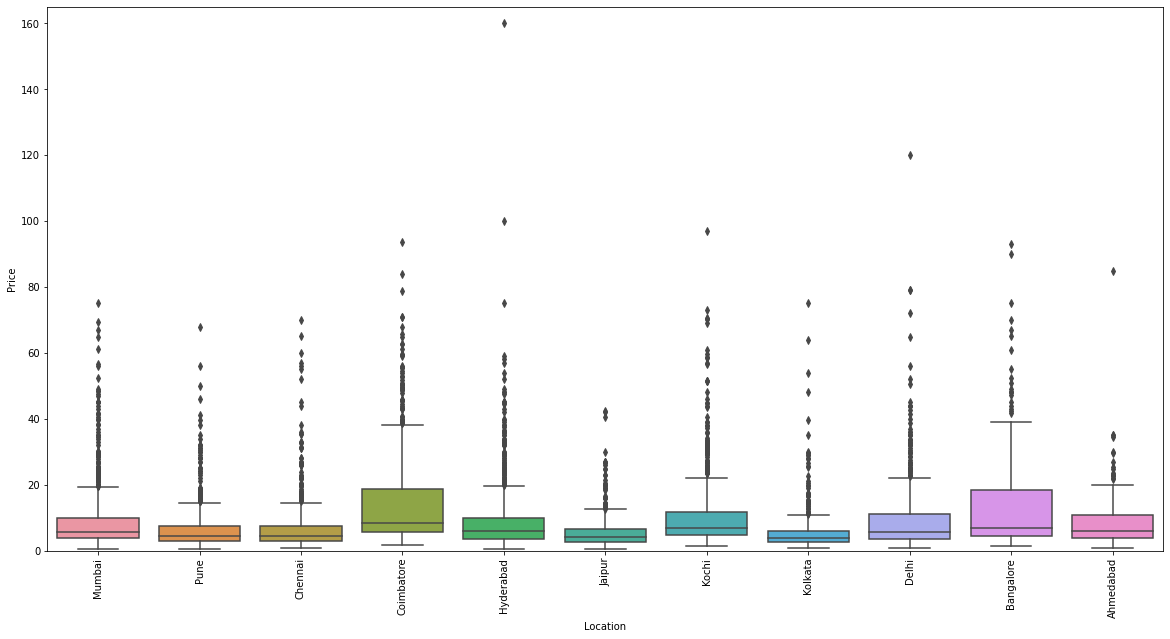

In [179]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x = "Location", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

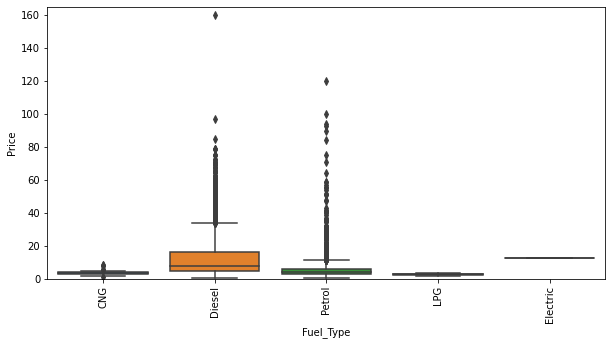

In [181]:
plt.figure(figsize=(10, 5))
fig = sns.boxplot(x = "Fuel_Type", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

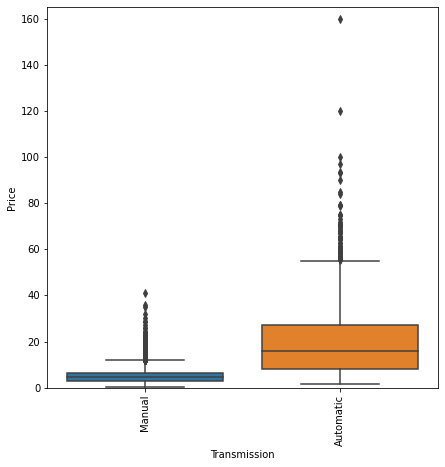

In [182]:
plt.figure(figsize=(7, 7))
fig = sns.boxplot(x = "Transmission", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

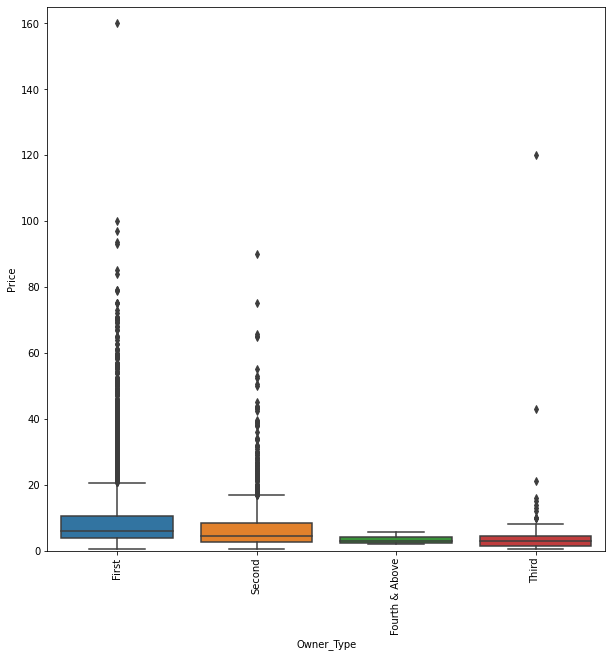

In [183]:
plt.figure(figsize=(10, 10))
fig = sns.boxplot(x = "Owner_Type", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

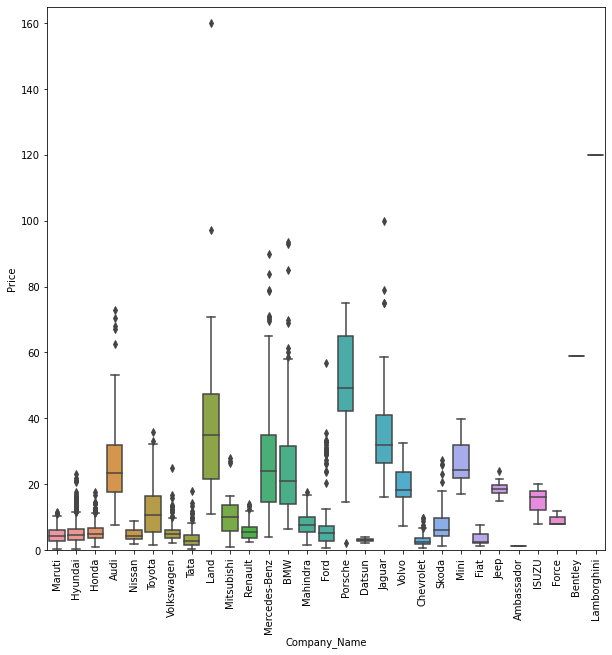

In [184]:
plt.figure(figsize=(10, 10))
fig = sns.boxplot(x = "Company_Name", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

In [ ]:
[Location, , 'Fuel_Type','Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Company_Name', 'Model_Name', 'Model_Age']

#### Multivariate

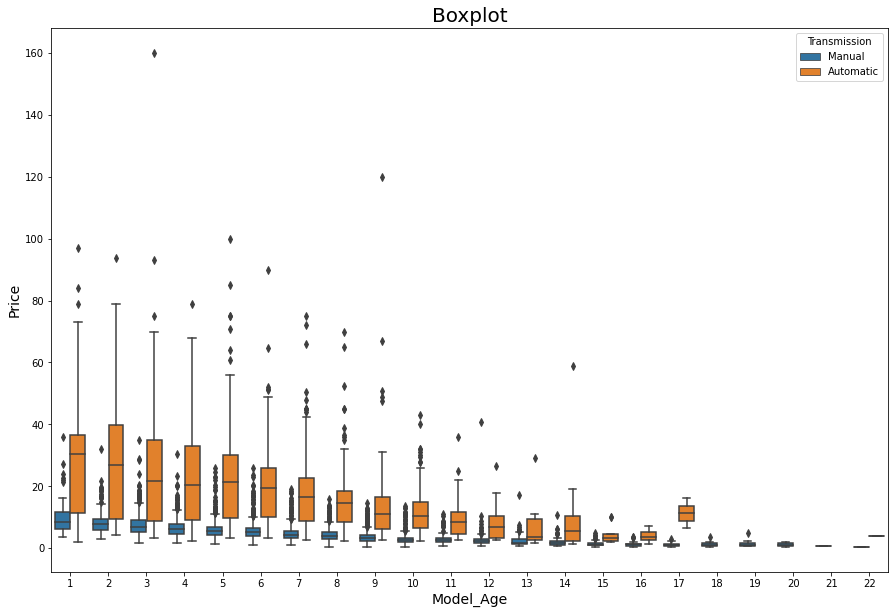

In [190]:
plt.figure(figsize=(15,10))
sns.boxplot(data=usedcars, x="Model_Age", y="Price", hue='Transmission')
plt.xlabel("Model_Age", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

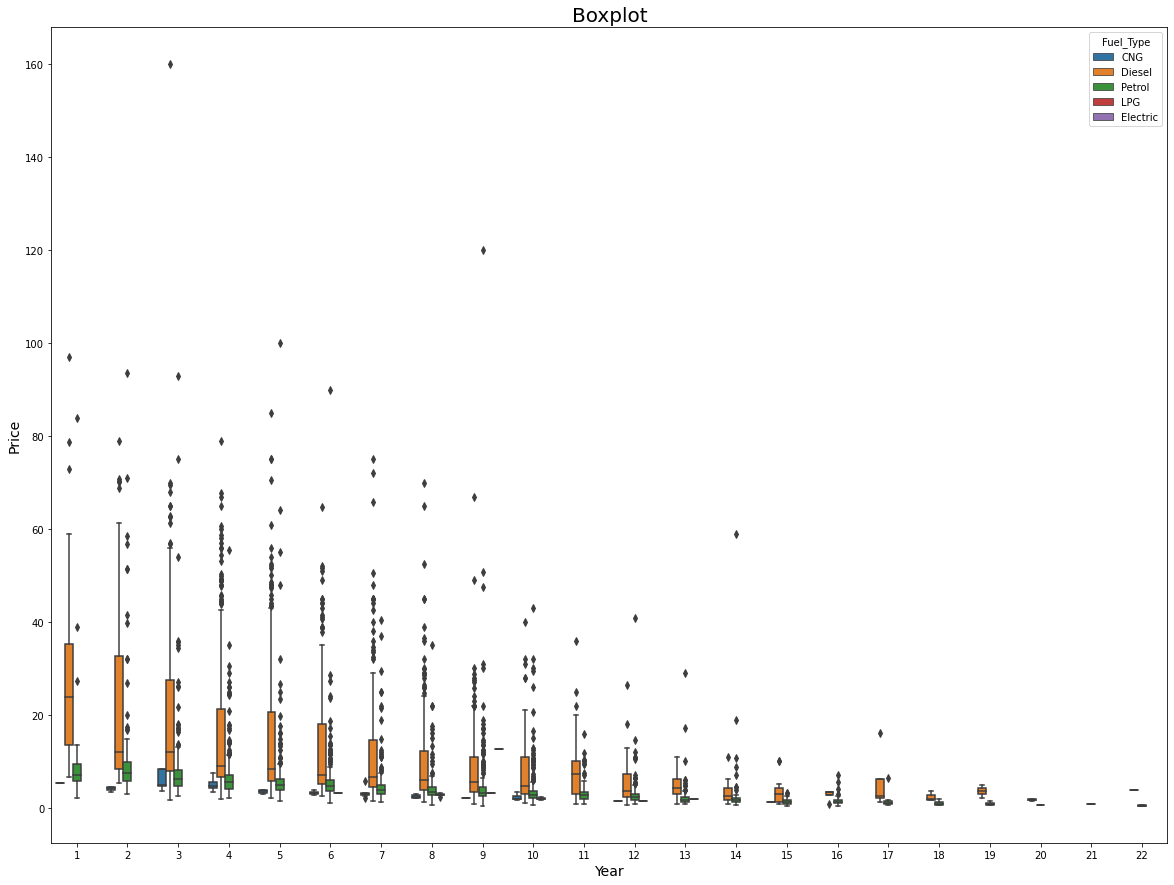

In [189]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Model_Age", y="Price", hue="Fuel_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Model_Age", y="Price", hue="Owner_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

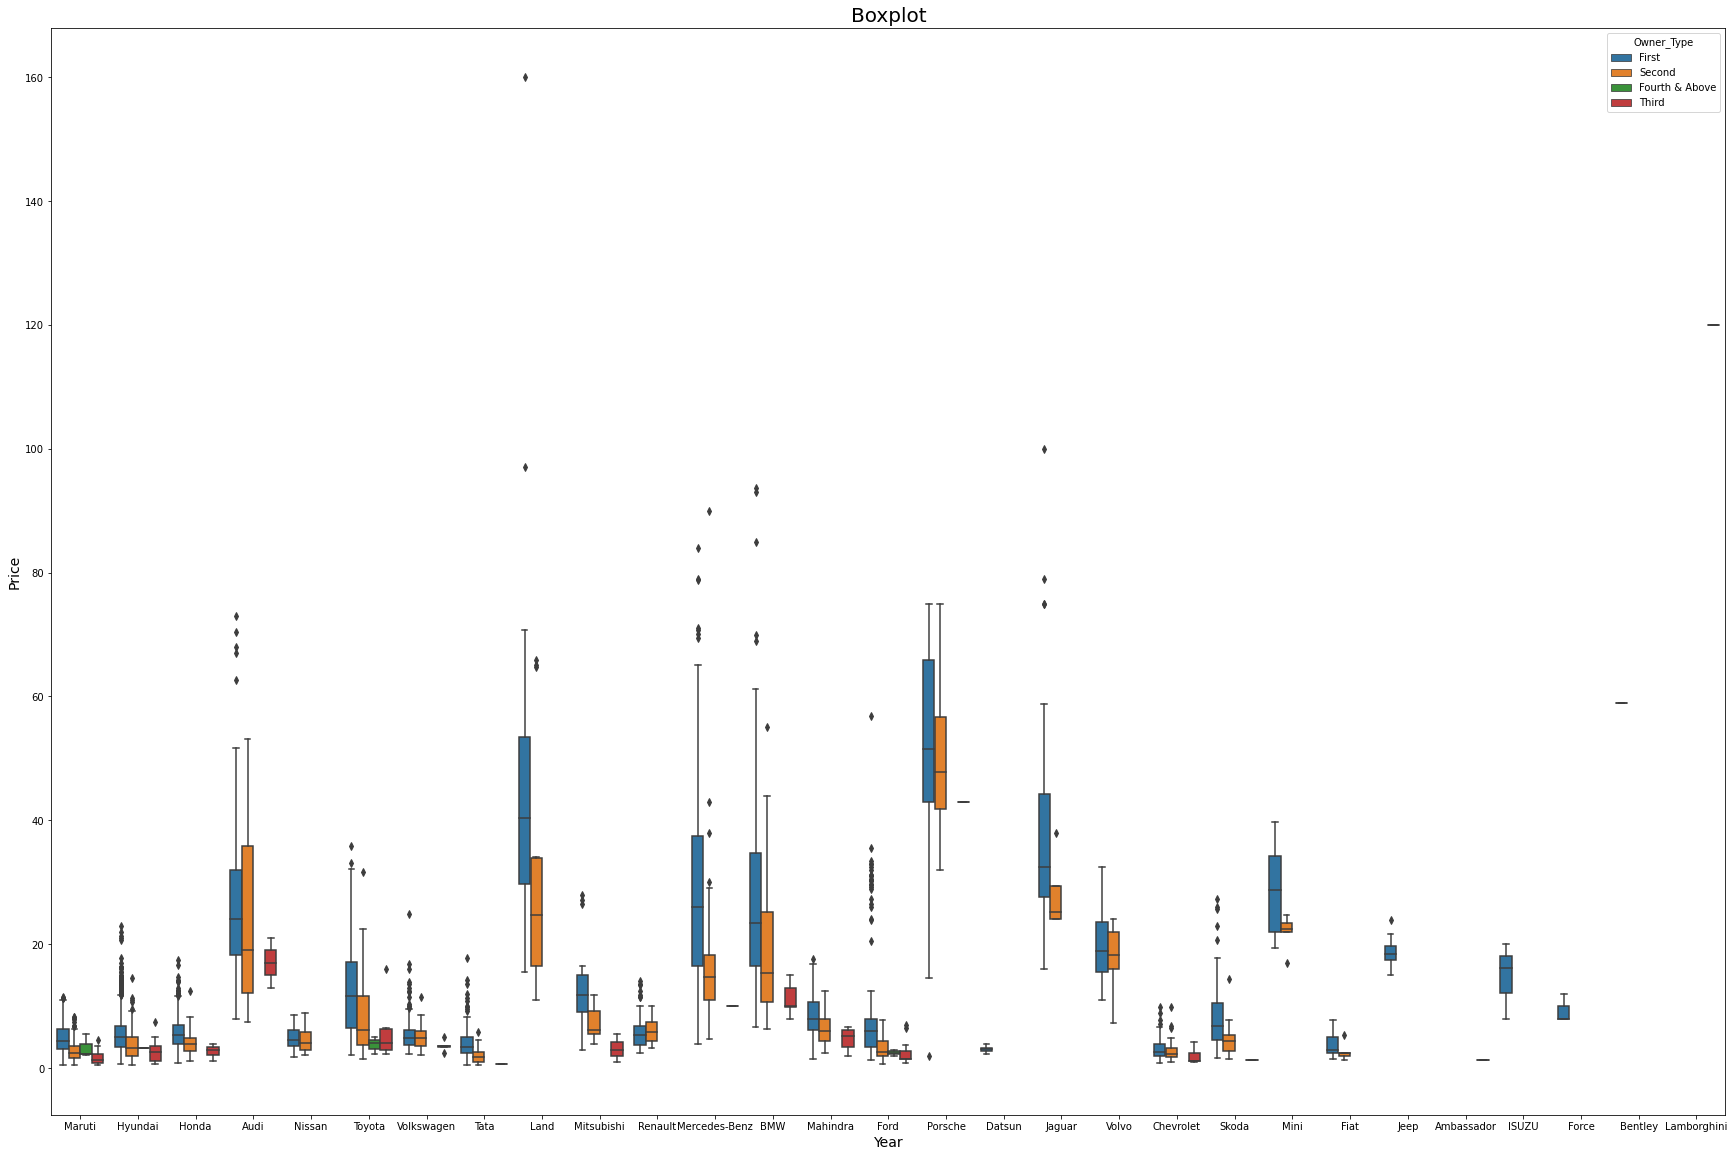

In [191]:
plt.figure(figsize=(30,20))
sns.boxplot(data=usedcars, x="Company_Name", y="Price", hue="Owner_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

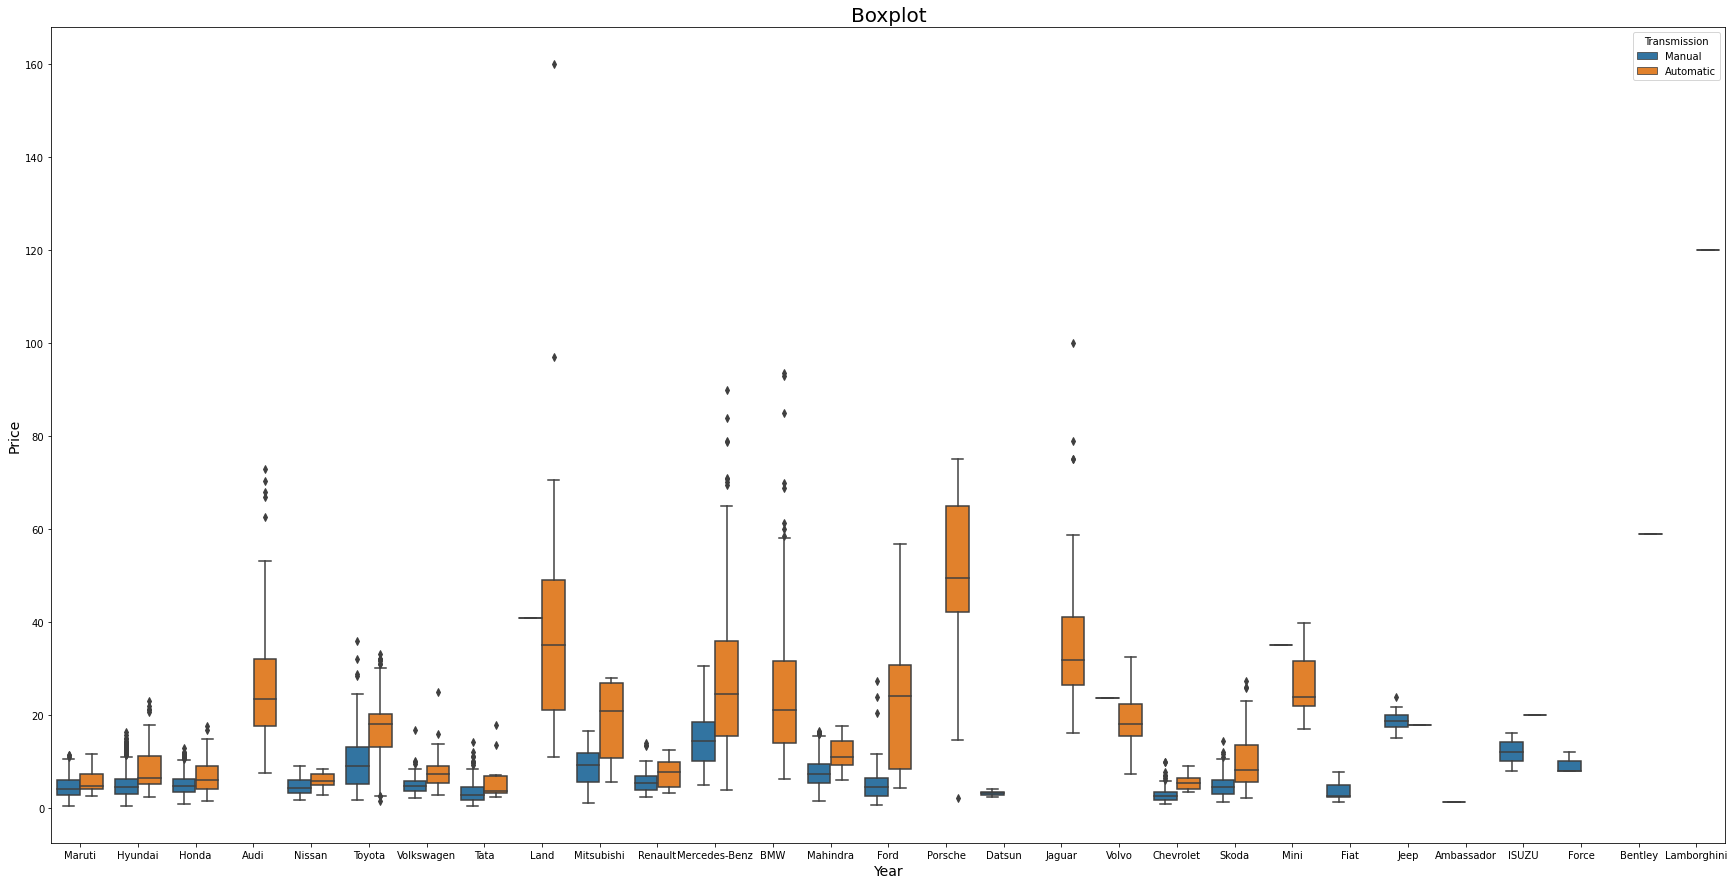

In [192]:
plt.figure(figsize=(30,15))
sns.boxplot(data=usedcars, x="Company_Name", y="Price", hue="Transmission")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

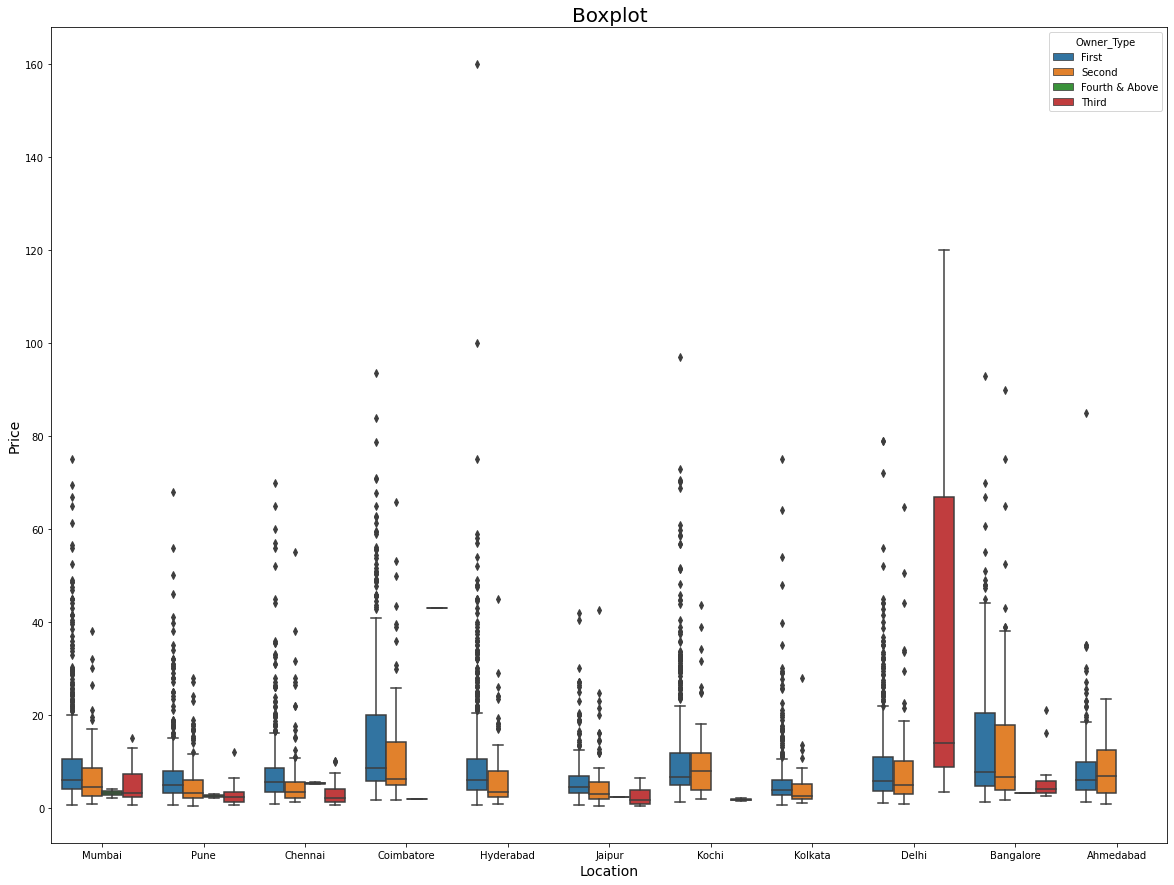

In [194]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Location", y="Price", hue="Owner_Type")
plt.xlabel("Location", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

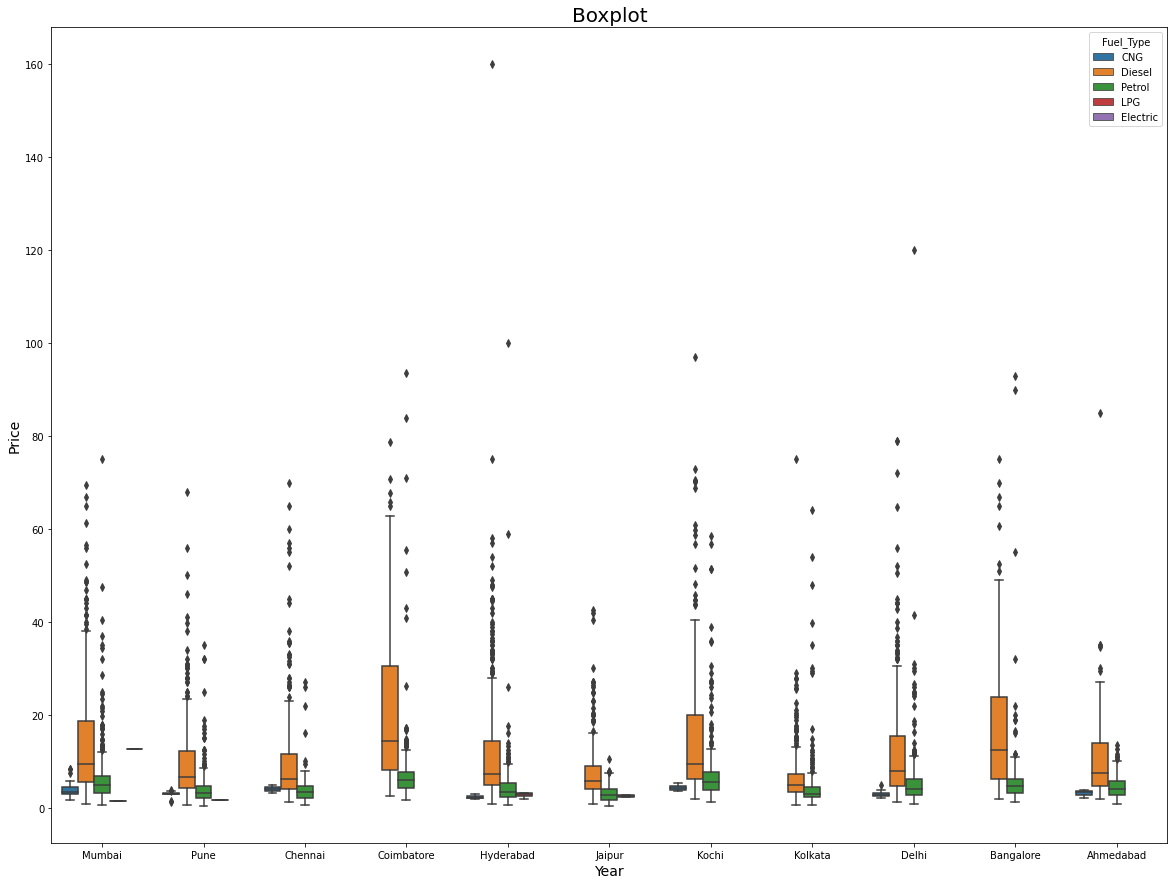

In [195]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Location", y="Price", hue="Fuel_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

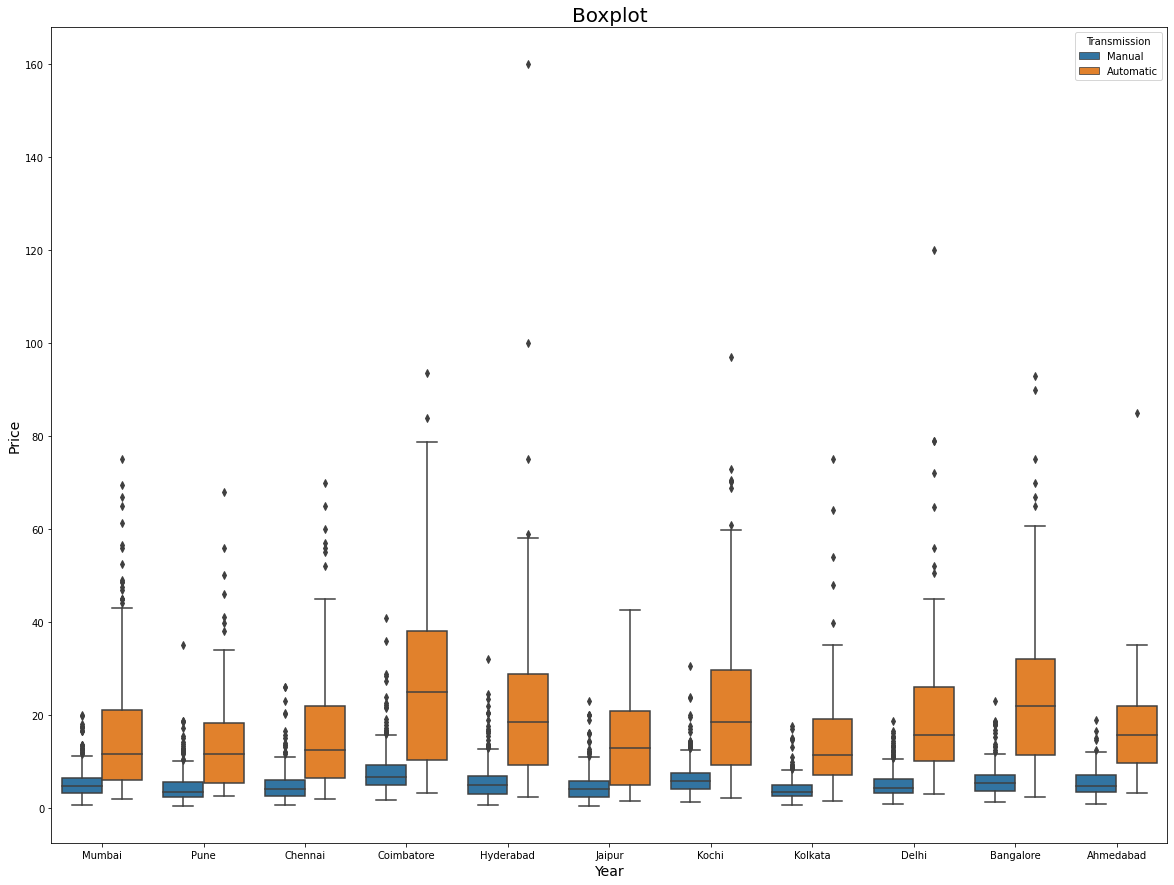

In [196]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Location", y="Price", hue="Transmission")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

In [220]:
usedcars = usedcars.drop(columns = ["Name"])
usedcars = usedcars.drop(columns = ["Location"])
usedcars = usedcars.drop(columns = ["Year"])

### One hot encoding

In [221]:
usedcars.head(1)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,...,Manual,CNG,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third
0,72000,CNG,Manual,First,147.63,998.0,58.16,5.0,1.75,6,...,1,1,0,0,0,0,1,0,0,0


In [199]:
Fuel_Type = pd.get_dummies(usedcars["Fuel_Type"])
Transmission = pd.get_dummies(usedcars["Transmission"])
Owner_Type = pd.get_dummies(usedcars["Owner_Type"])

In [200]:
usedcars = pd.concat([usedcars,Transmission,Fuel_Type,Owner_Type],axis=1)

In [201]:
usedcars.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Manual,CNG,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,147.63,998.0,58.16,...,1,1,0,0,0,0,1,0,0,0


Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Company_Name', 'Model_Age', 'Automatic', 'Manual', 'CNG', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'First', 'Fourth & Above', 'Second',
       'Third'],
      dtype='object')

### Label Encoding

In [209]:
usedcars['Company_Name'].value_counts()

Maruti           1210
Hyundai          1100
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          270
BMW               266
Audi              235
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             90
Land               60
Jaguar             40
Mitsubishi         27
Fiat               26
Mini               26
Volvo              21
Porsche            16
Jeep               15
Datsun             13
ISUZU               3
Force               3
Lamborghini         1
Ambassador          1
Bentley             1
Name: Company_Name, dtype: int64

In [210]:
mean_price_company = pd.DataFrame(usedcars.groupby("Company_Name")['Price'].mean())
mean_price_company = mean_price_company.sort_values(by=['Price'])
print(mean_price_company)

                    Price
Company_Name             
Ambassador       1.350000
Chevrolet        3.044463
Datsun           3.049231
Fiat             3.466923
Tata             3.562849
Maruti           4.520298
Nissan           4.754889
Volkswagen       5.307270
Hyundai          5.364673
Honda            5.411743
Renault          5.799034
Ford             6.889400
Skoda            7.559075
Mahindra         8.051074
Force            9.333333
Mitsubishi      11.058889
Toyota          11.580024
ISUZU           14.696667
Jeep            18.718667
Volvo           18.802857
BMW             25.093684
Audi            25.569787
Mercedes-Benz   26.809874
Mini            26.896923
Jaguar          37.632250
Land            39.259500
Porsche         49.204375
Bentley         59.000000
Lamborghini    120.000000


<b>Numbers have been assigned to brands in such a manner that brand which have higher mean prices got higher number. For 
eg Lamborghini have highest mean price so got the largest number.</b>

In [211]:
usedcars.replace({'Ambassador':1,'Datsun':2, 'Chevrolet':3, 'Fiat':4, 'Tata':5, 'Maruti':6, 'Nissan':7, 'Volkswagen':8, 
                'Honda':9, 'Hyundai':10, 'Renault':11, 'Ford':12, 'Skoda':13, 'Mahindra':14, 'Force':15, 'Mitsubishi':16, 'Toyota':17, 
                'ISUZU':18, 'Jeep':19, 'Volvo':20, 'BMW':21, 'Audi':22, 'Mercedes-Benz':23, 'Mini':24, 'Jaguar':25, 'Land':26, 'Porsche':26,
                'Bentley':27, 'Lamborghini':28},inplace=True)

In [ ]:
usedcars = usedcars.drop(columns = ["Fuel_Type","Transmission","Owner_Type","Model_Name"])

In [227]:
usedcars.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Company_Name', 'Model_Age', 'Automatic', 'Manual', 'CNG', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'First', 'Fourth & Above', 'Second',
       'Third'],
      dtype='object')

### Correlation Matrix

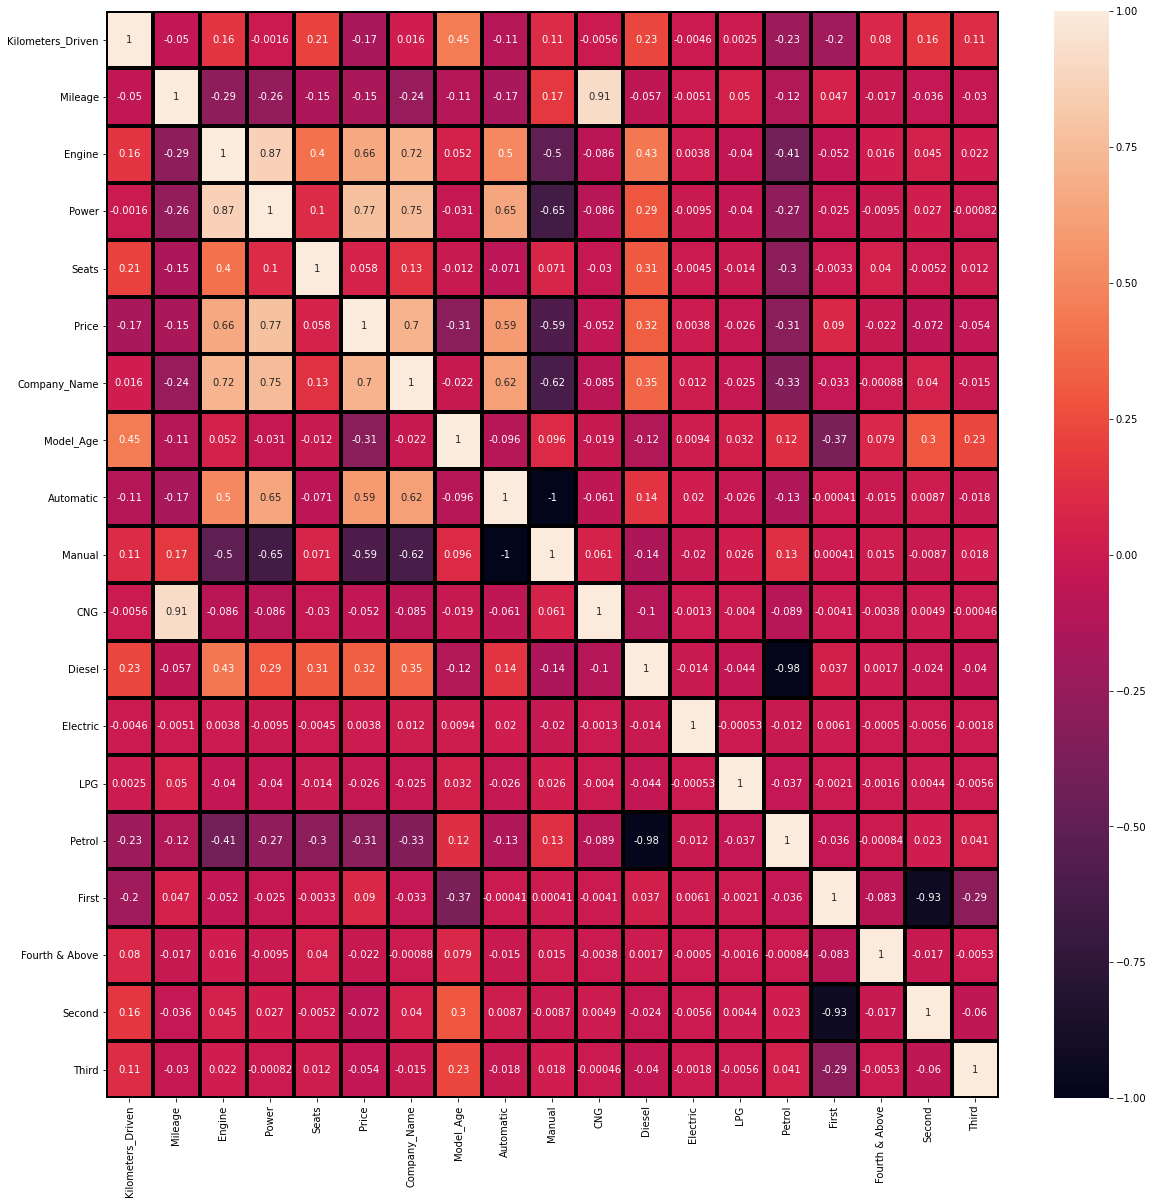

In [228]:
plt.figure(figsize=(20,20))
sns.heatmap(usedcars.corr(), annot=True, linewidths=3, linecolor='black')
plt.show()

## Model 1: Multiple Linear Regression
**(Without standardising the numerical variables)**

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
usedcars_X = usedcars.drop(["Price"], axis = 1)
usedcars_y = usedcars["Price"]

In [232]:
X1_train, X1_test, y1_train, y1_test = train_test_split(usedcars_X, usedcars_y, test_size=0.3,random_state=100)

In [233]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred= model1.predict(X1_test)
print("Traing set: ",model1.score(X1_train,y1_train))
print("Testing set: ",model1.score(X1_test,y1_test))

Traing set:  0.7368204922886146
Testing set:  0.6902691393044308


In [235]:
usedcars.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Company_Name', 'Model_Age', 'Automatic', 'Manual', 'CNG', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'First', 'Fourth & Above', 'Second',
       'Third'],
      dtype='object')

## Model 2: Multiple Linear Regression
**(With Standardising the numerical variables)**

In [234]:
usedcars_std = usedcars

In [236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(usedcars_std[["Kilometers_Driven","Mileage","Engine","Power","Seats","Price","Company_Name","Model_Age"]])
usedcars_std_1 = scaler.transform(usedcars_std[["Kilometers_Driven","Mileage","Engine","Power","Seats","Price","Company_Name","Model_Age"]])


In [238]:
usedcars_std_1 = pd.DataFrame(usedcars_std_1, columns = ["Kilometers_Driven","Mileage","Engine","Power","Seats","Price","Company_Name","Model_Age"])

In [240]:
usedcars_std_1

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Age
0,0.379753,9.934076,-1.038690,-1.014447,-0.349537,-0.692171,-0.953444,1.039699
1,-0.438688,0.019134,-0.063920,0.252515,-0.349537,0.271165,-0.269694,-0.500168
2,-0.306681,-0.094768,-0.703196,-0.445767,-0.349537,-0.445736,-0.440632,0.731726
3,0.775773,0.104367,-0.621408,-0.444649,2.146088,-0.311317,-0.953444,0.423752
4,-0.447400,-0.327222,0.580363,0.524379,-0.349537,0.740735,1.781554,0.115779
...,...,...,...,...,...,...,...,...
5996,-0.798670,0.695576,-0.621408,-0.719493,-0.349537,-0.423333,-0.953444,-0.192195
5997,1.118990,0.385637,-0.835057,-0.775356,-0.349537,-0.490543,-0.269694,-0.500168
5998,-0.069070,-0.420204,1.465000,-0.011901,3.393900,-0.589117,0.414055,0.423752
5999,-0.306681,-0.040529,-1.038690,-0.847977,-0.349537,-0.611520,-0.953444,0.115779


In [241]:
usedcars_std_2 = usedcars_std.drop(columns = ["Kilometers_Driven","Mileage","Engine","Power","Seats","Price","Company_Name","Model_Age"] )

In [242]:
usedcars_std_2

,Automatic,Manual,CNG,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third
0,0,1,1,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,1,0,0,0
3,0,1,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6014,0,1,0,1,0,0,0,1,0,0,0
6015,0,1,0,1,0,0,0,1,0,0,0
6016,0,1,0,1,0,0,0,0,0,1,0
6017,0,1,0,0,0,0,1,1,0,0,0


In [243]:
usedcars_std_merged = pd.merge(usedcars_std_1,usedcars_std_2, left_index = True, right_index = True)

In [245]:
usedcars_std_merged.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Company_Name', 'Model_Age', 'Automatic', 'Manual', 'CNG', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'First', 'Fourth & Above', 'Second',
       'Third'],
      dtype='object')

In [246]:
usedcars_std_X = usedcars_std_merged.drop(["Price"], axis = 1)
usedcars_std_y = usedcars_std_merged["Price"]

In [247]:
X2_train, X2_test, y2_train, y2_test = train_test_split(usedcars_std_X, usedcars_std_y, test_size=0.3,random_state=100)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred= model2.predict(X2_test)
print("Traing set: ",model2.score(X2_train,y2_train))
print("Testing set: ",model2.score(X2_test,y2_test))

Traing set:  0.7099914269129453
Testing set:  0.7358934899754084


## Model 3: KNN
**(Without standardising the numerical variables)**

In [254]:
from sklearn import neighbors

In [256]:
for k in range(5):
    k = k+1
    model3 = neighbors.KNeighborsRegressor(n_neighbors = k)
    model3.fit(X1_train, y1_train)
    
    y3_pred=model3.predict(X1_test)
    
    print("Traing set_r2: ", k, "is: ", model3.score(X1_train,y1_train))
    print("Testing set_r2: ",k, "is: ", model3.score(X1_test,y1_test))

Traing set_r2:  1 is:  0.999726001613628
Testing set_r2:  1 is:  0.46911075575242067
Traing set_r2:  2 is:  0.8450004766785851
Testing set_r2:  2 is:  0.5496531314817588
Traing set_r2:  3 is:  0.7849971733605132
Testing set_r2:  3 is:  0.5658045879518033
Traing set_r2:  4 is:  0.7444300760889524
Testing set_r2:  4 is:  0.5524170394881611
Traing set_r2:  5 is:  0.7159352026986028
Testing set_r2:  5 is:  0.5377131427937618


## Model 4: KNN
**(With Standardising the numerical variables)**

In [257]:
for k in range(5):
    k = k+1
    model4 = neighbors.KNeighborsRegressor(n_neighbors = k)
    model4.fit(X2_train, y2_train)
    
    y4_pred=model4.predict(X2_test)
    
    print("Traing set_r2: ", k, "is: ", model4.score(X2_train,y2_train))
    print("Testing set_r2: ",k, "is: ", model4.score(X2_test,y2_test))

Traing set_r2:  1 is:  0.9999904696635031
Testing set_r2:  1 is:  0.7484390802575682
Traing set_r2:  2 is:  0.9473544755219884
Testing set_r2:  2 is:  0.829603185781899
Traing set_r2:  3 is:  0.9168216243367893
Testing set_r2:  3 is:  0.8421644343500895
Traing set_r2:  4 is:  0.9058966605677771
Testing set_r2:  4 is:  0.8467598497551877
Traing set_r2:  5 is:  0.8975263354774902
Testing set_r2:  5 is:  0.8505950584273535


## Model 5: Decision Tree
**(Without standardising the numerical variables)**

In [249]:
from sklearn.metrics import mean_squared_error, r2_score

In [252]:
from sklearn.tree import DecisionTreeRegressor 
  
model5 = DecisionTreeRegressor(random_state = 100) 
model5.fit(X1_train, y1_train)

y5_pred = model5.predict(X1_test)

print("Traing set_r2: ",model5.score(X1_train,y1_train))
print("Testing set_r2: ",model5.score(X1_test,y1_test))

Traing set_r2:  0.9998854305325113
Testing set_r2:  0.7454946889836016


## Model 6: Decision Tree
**(With standardising the numerical variables)**

In [253]:
model6 = DecisionTreeRegressor(random_state = 100) 
model6.fit(X2_train, y2_train)

y6_pred = model6.predict(X2_test)

print("Traing set_r2: ",model6.score(X2_train,y2_train))
print("Testing set_r2: ",model6.score(X2_test,y2_test))

Traing set_r2:  0.9999952348317516
Testing set_r2:  0.7886929880012399
